In [1]:
from google.colab import files
uploaded = files.upload()


Saving haberman.csv to haberman.csv


In [2]:
import pandas as pd
import io
haberman = pd.read_csv(io.BytesIO(uploaded['haberman.csv']))
print(haberman.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [3]:
haberman.shape

(306, 4)

Haberman DataSet has 306 data points and 4 features

In [4]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

Features represent (description from kaggle) -
* age: Age of patient at time of operation (numerical)
* year: Patient's year of operation (year - 1900, numerical)
* nodes: Number of positive axillary nodes detected (numerical)
* status: Survival status (class attribute) 1(changed to 'Yes') = the patient survived 5 years or longer & 2(changed to 'No') = the patient died within 5 years

#**Objective** -
### Explore the Haberman dataset which consists of datapoints of women who underwent surgery for breast cancer and perform analysis using the available features, to be able to classify whether a cancer patient survives longer than 5 years or not post surgery.

In [5]:
haberman.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

Observation: No null/missing values for any of the 4 columns.

In [6]:
haberman['status'] = haberman['status'].astype('str')
haberman = haberman.replace({'status':{'1':'Yes','2':'No'}})
print(haberman['status'].value_counts())

Yes    225
No      81
Name: status, dtype: int64


Observation: Among 306 patients, count of data points for each of the 2 classes -> 
1. Survived : 225 patients survived for 5 years or longer 
2. Not-Survived : 81 patients died within 5 years




In [7]:
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


Basic statistical analysis:

* Patient's age in the dataset varies from 30 to 83, with 52 being the average.
* Year of operation ranges from 58 to 69.
* Eventhough the maximum number of axilary nodes is 52, among 306 patients 75% of patients had nodes <= 4 and 50% of patients had nodes <=1.

## **Univariate Analysis**

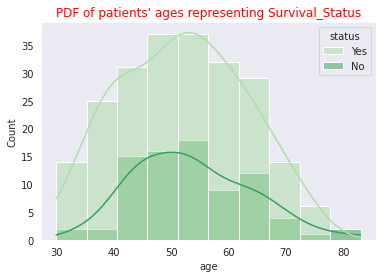

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('dark')
sns.histplot(data=haberman, x='age', kde=True, hue='status', palette='Greens', bins=10)
plt.title("PDF of patients' ages representing Survival_Status", fontsize=12, color='Red')
plt.show()

Observation: Plot shows patients of age between 40 and 60 survived the most.
Also, patients of age between 40 and 55 died the most. 

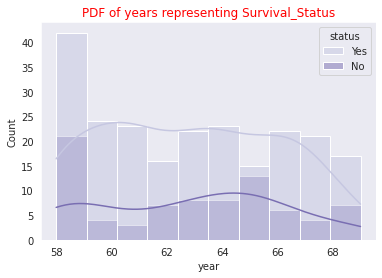

In [14]:
sns.histplot(data=haberman, x='year', kde=True, hue='status', palette='Purples', bins=10)
plt.title('PDF of years representing Survival_Status', fontsize=12, color='Red')
plt.show()

Observation: Patients survived the most between year 58-59. Also, the same year saw highest death rate.

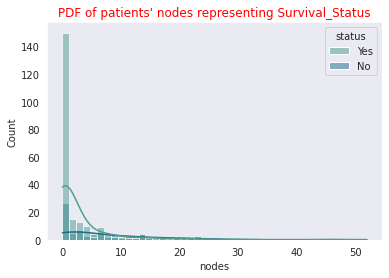

In [15]:
sns.histplot(data=haberman, x='nodes', kde=True, hue='status', palette='crest')
plt.title("PDF of patients' nodes representing Survival_Status", fontsize=12, color='Red')
plt.show()

Observation: Patients with axillary nodes 0 to 5 has higher survival chance. 

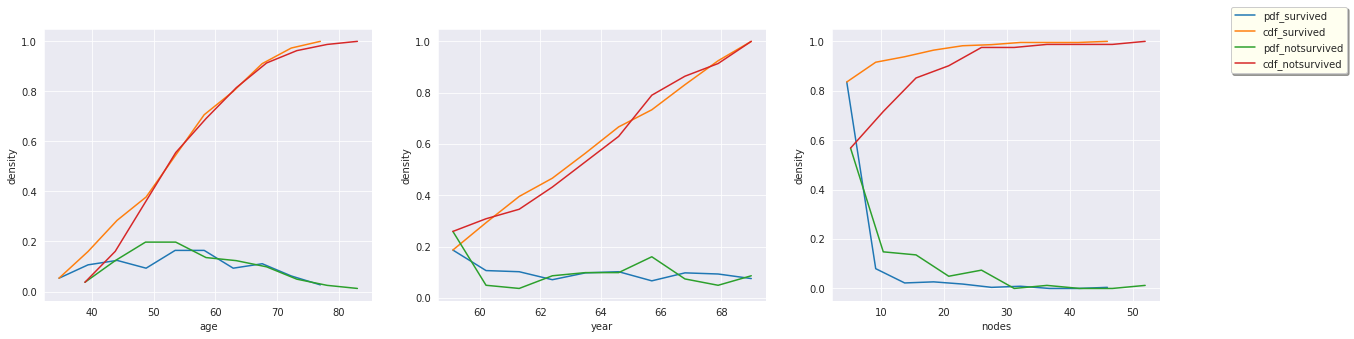

In [33]:
import numpy as np
plt.figure(figsize=(20,5))
features_list = list(haberman.columns)

haberman_survived_yes = haberman[haberman['status']=='Yes']
haberman_survived_no = haberman[haberman['status']=='No']

sns.set_style('darkgrid')

for feature in features_list:
  if(feature!='status'):
    plt.subplot(1, 3,features_list.index(feature)+1)
    
    # PDF and CDF for Survived class
    counts, bin_edges = np.histogram(haberman_survived_yes[feature], bins=10, density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf)
    plt.plot(bin_edges[1:], cdf)
    
    # PDF and CDF for Not-Survived class
    counts, bin_edges = np.histogram(haberman_survived_no[feature], bins=10, density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf)
    plt.plot(bin_edges[1:], cdf)

    plt.xlabel(feature)
    plt.ylabel('density')

plt.legend(['pdf_survived', 'cdf_survived', 'pdf_notsurvived', 'cdf_notsurvived'], bbox_to_anchor =(1.2, 1.1),
           facecolor='ivory', shadow=True)  #anchor the legend position outside plot space using bbox_to_anchor()
plt.show()

Observation:

83% of patients among the survived(225) had axliary nodes <= 5 i.e. 186 patients out of 225.

So if a patient has nodes <=5 there is 60% chance of survival in total.

## **Bivariate Analysis**

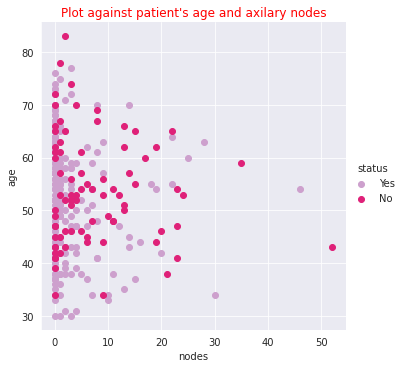

In [18]:
sns.set_style('darkgrid')
sns.FacetGrid(haberman, hue='status', height=5, palette='PuRd').map(plt.scatter, 'nodes', 'age').add_legend();
plt.title("Plot against patient's age and axilary nodes", fontsize=12, color='Red')
plt.show();

Observation: 
*  A patient with axilary nodes less than 5 has high chance of survival, with 0 being the highest.
*  Survival rate becomes lesser as age and nodes become higher, an Inverse relation.



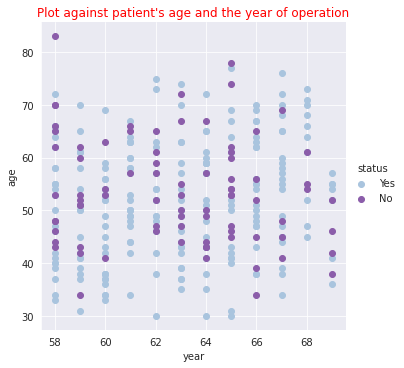

In [19]:
sns.set_style('darkgrid')
sns.FacetGrid(haberman, hue='status', height=5, palette='BuPu').map(plt.scatter, 'year', 'age').add_legend();
plt.title("Plot against patient's age and the year of operation", fontsize=12, color='Red')
plt.show();

Observation: 
* Year 60, 61, 67 and 68 saw low death-to-patient ratio.

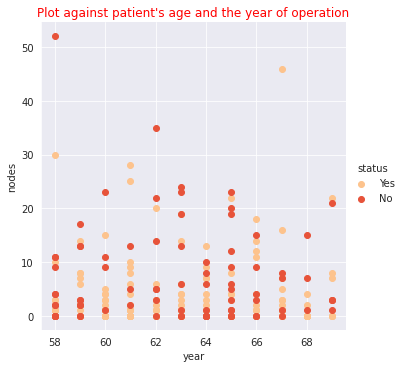

In [20]:
sns.set_style('darkgrid')
sns.FacetGrid(haberman, hue='status', height=5, palette='OrRd').map(plt.scatter, 'year', 'nodes').add_legend();
plt.title("Plot against patient's age and the year of operation", fontsize=12, color='Red')
plt.show();

Observation: Survival rate of patients is high when axilary nodes is less than 10. 

###Pair-Plot

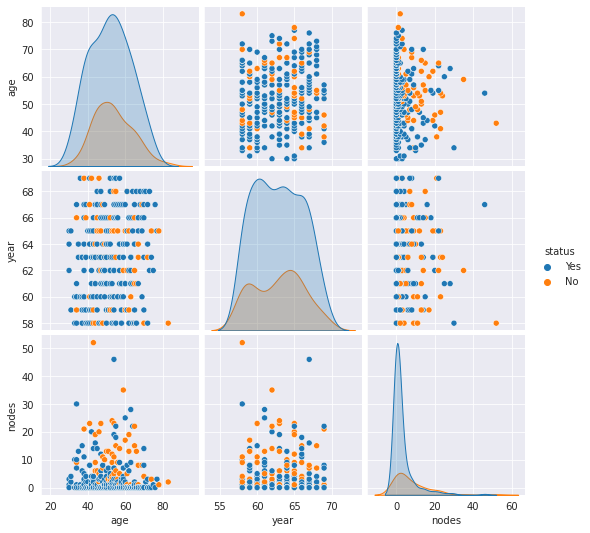

In [21]:
sns.pairplot(data=haberman, hue='status')
plt.show()

Observation:

1. From the Univariate plots of Pairplot (i.e. the diagonal plots), 
  * we can see that it is not easy to distinguish whether a patient survives or not with either of the 3 attributes, as data points of both classes are mostly overlapping and no simple if-else would classify the survival with considerate accuracy. 
  * the least overlapping feature is Nodes, so let's use this to draw conclusions.

2. From the Bivariate plots of Pairplot (i.e. non-diagonal plots), 
  * the plot of Age against Year and Nodes against Year seems more overlapping than the plot of Age against Nodes. So let's use Age & Nodes for further Bivariate and Multivariate analysis.

###BoxPlot and ViolinPlot

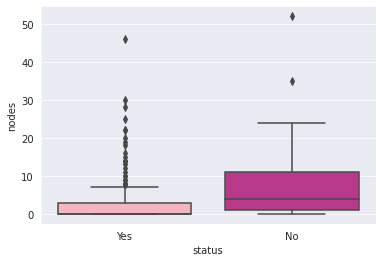

In [22]:
sns.boxplot(data=haberman, x='status', y='nodes', palette='RdPu')
plt.show()

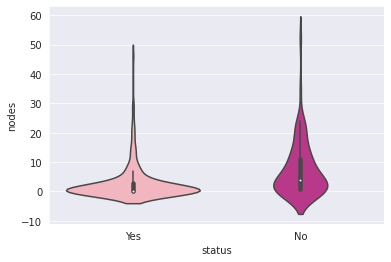

In [23]:
sns.violinplot(data=haberman, x='status', y='nodes', palette='RdPu')
plt.show()

Observation:

* 50% of the people who survived had zero axilary nodes
* 75% of patients survived with axilary nodes <=3
* 50% of patients who did not survive had nodes between 1 to 11
* Many outliers among Survived class.

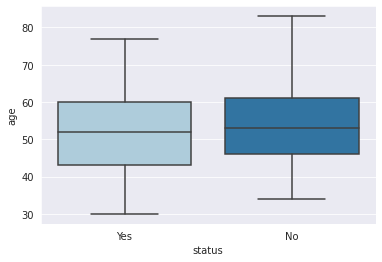

In [24]:
sns.boxplot(data=haberman, x='status', y='age', palette='Paired')
plt.show()

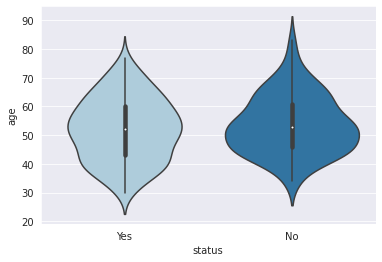

In [25]:
sns.violinplot(data=haberman, x='status', y='age', palette='Paired')
plt.show()

Observation:
* 50% of the patients who survived were between age 43 to 60.
* 50 % of the patients who did not survive were between age 47 and 61 

###Statistical analysis of the most important feature "nodes" for the classification using both classes

In [36]:
print(sorted(haberman_survived_yes['nodes']),end='\n\n')

print('90%       ',np.percentile(haberman_survived_yes['nodes'],90),end='\n\n')
print(haberman_survived_yes['nodes'].describe(),end='\n\n')

print("Mean:", np.mean(haberman_survived_yes['nodes']))
print("Mean with outlier:", np.mean(np.append(haberman_survived_yes['nodes'],100)));
print("Standard deviation: ", np.std(haberman_survived_yes['nodes']))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 10, 10, 11, 12, 13, 14, 14, 14, 15, 16, 18, 19, 20, 22, 22, 25, 28, 30, 46]

90%        8.0

count    225.000000
mean       2.791111
std        5.870318
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       46.000000
Name: nodes, dtype: float64

Mean: 2.7911111111111113
Mean with outlier: 3.2212389380530975
Standard deviation:  5.8572584494121

**Observation of patients who survived:**
 
1.  Axilary nodes of patients who survived ranged from 0 to 46.
2.  90% of the patients who survived had axilary nodes <= 8
3.  From the quantiles, 
    * 50% of the patients who survived had zero axilary node.
    * 75% of the people survived with axilary nodes <= 3


In [37]:
print(sorted(haberman_survived_no['nodes']),end='\n\n')

print('90%      ',np.percentile(haberman_survived_no['nodes'],90),end='\n\n')
print(haberman_survived_no['nodes'].describe(),end='\n\n')

print("Mean:", np.mean(haberman_survived_no['nodes']))
print("Mean with outlier:", np.mean(np.append(haberman_survived_no['nodes'],100)));
print("Standard deviation: ", np.std(haberman_survived_no['nodes']))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 8, 8, 9, 9, 9, 9, 10, 11, 11, 11, 12, 13, 13, 13, 13, 14, 15, 15, 17, 19, 19, 20, 21, 22, 23, 23, 23, 24, 35, 52]

90%       20.0

count    81.000000
mean      7.456790
std       9.185654
min       0.000000
25%       1.000000
50%       4.000000
75%      11.000000
max      52.000000
Name: nodes, dtype: float64

Mean: 7.45679012345679
Mean with outlier: 8.585365853658537
Standard deviation:  9.128776076761632


**Observation of patients who did not survive:**
 
Although the axilary nodes of patients who did not survive ranges from 0 to 52,

1.  90% of the patients who did not survive had axilary nodes <= 20
2.  From the quantiles,  

    *   25% of the patients who didn't survive had axilary nodes <= 1
    *   50% of the patients who didn't survive had axilary nodes <= 4
    *   75% of the patients Who didn't survive had axilary nodes <= 11



##**Multivariate Analysis**
### Contour plot of 2D density of Age and Axilary nodes


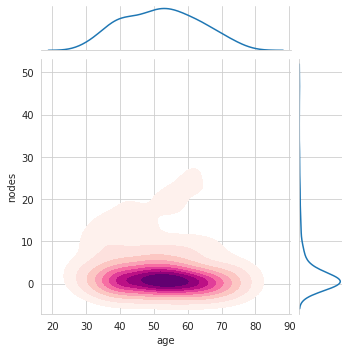

In [28]:
sns.set_style('whitegrid')
sns.jointplot(x='age', y='nodes', data=haberman_survived_yes, kind='kde', shade=True, cmap='RdPu', height=5)
plt.show()

**Observation:**

Graph represents contour plot of 2D density of age and nodes for patients who survived longer than 5 years,

  *   Density is high (peak in 3D, dark contour in 2D) for patients of age 45-60 and axilary nodes of 0-3.
  *   Most patients who had axilary nodes less than 10, survived.



#**Conclusion :-**
### We can use Axilary nodes and Age feature to classify if patient survives longer than 5 years or not, but with low accuracy as many data points of both classes in Haberman's dataset were overlapping. 

### Patients with nodes less than 3 has high survival chance.
